<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/Modelling_a_Genrated_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate a fixed sequence of numbers and try finding the simplest, most accurate model 

#### 1. Generate the sequence of 1,000 numbers
#### 2. Split into 80% training + 20% testing 
#### 3. Try various models 
#### 4. Plot the estimates
#### 5. Fine tune the models 
#### 6. Try a bit of over fitting 
#### 7. Redo with some gaps in the data
#### 8. Redo with some added noise in the data 

**[Possible Tuning Methods for models]**

1. ***Change learning rate***
2. ***Change number of epochs***
3. ***Add dense layers***
4. ***Add neurons per layer*** 
5. ***Change activation function***
6. ***Change optimizer***
7. ***Change loss function***
8. ***Use more training data***


In [50]:
# Do the imports and initial setup 
# Need to have the following as global variables 
def my_setup() :
  global tf, np, plt, tfp, pm
  import tensorflow as tf 
  import numpy as np 
  import matplotlib.pyplot as plt 
  import tensorflow_probability as tfp
  from tensorflow.keras.utils import plot_model as pm 
  tf.random.set_seed(42)
  
 

In [56]:
# Function to show names and versions of the stuff I am using
def my_modules():
  print("tf =",tf.__version__,"| np =",np.__version__,"| tfp =",tfp.__version__
        )
#pip show tensorflow matplotlib numpy
#pip list 

In [3]:
# Function to do basic stats on a simple tensor 
def my_stats(data):
  print("Min = ",tf.math.reduce_min(data))
  print("Q25 = ",tfp.stats.percentile(data, 25))
  print("Q50 = ",tfp.stats.percentile(data, 50))
  print("Q90 = ",tfp.stats.percentile(data, 90))
  print("Max= ",tf.math.reduce_max(data))
  print("Mean = ",tf.math.reduce_mean(data))
  print("Std Dev = ",tfp.stats.stddev(data))
  print()
  # Do histogram 
  plt.hist(data)

In [4]:
# Function to do basic stats on a simple tensor 
def my_stats2(data):
  print("Min=",tf.math.reduce_min(data).numpy().round(2),"Q25=",tfp.stats.percentile(data, 25).numpy().round(2),"Q50=",tfp.stats.percentile(data, 50).numpy().round(2),
        "Q90=",tfp.stats.percentile(data, 90).numpy().round(2))
  print("Max=",tf.math.reduce_max(data).numpy().round(2),"Mean=",tf.math.reduce_mean(data).numpy().round(2),"StdDev=",tf.squeeze(tfp.stats.stddev(data)).numpy().round(2))
  print()
  # Do histogram 
  plt.hist(data)

In [5]:
# Function to calculate the mean absolute error and the mean squared error 
def my_mae_mse(y_test,y_pred):
  mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
  mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
  print ('mae = ',mae.numpy(),'| mse = ',mse.numpy())

In [6]:
# Create plotting function
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  # The doc string 
  """
  Plots the training data and the ground truth vs the prediction
  """
  # Ctrl + Shift + space - will show the docstring in colab jupyter notebooks 
  plt.figure(figsize=(15,10))
  # Plot the training data in blue 
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  # Plot the test data in green
  plt.scatter(test_data,test_labels,c='g',label="Test data")
  # Plot the predictions in red 
  plt.scatter(test_data,predictions,c='r', label="Predictions")
  # Show legend
  plt.legend()

In [51]:
my_setup()


In [57]:
my_modules()

tf = 2.6.0 | np = 1.19.5 | tfp = 0.14.1


In [9]:
# Generate the dataset 
# X_train, y_train, X_test, y_test 
# Using tf.range

X = tf.range(start=1.0, limit=3000, delta=2)
y = tf.range(start=100.0, limit=3100, delta=2)
# y= X + 100
X.shape, y.shape


(TensorShape([1500]), TensorShape([1500]))

In [10]:
# Now split into training 1000 and test 500 
# Preserve the order initially 
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]



Min =  tf.Tensor(1.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(501.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1001.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1799.0, shape=(), dtype=float32)
Max=  tf.Tensor(1999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1000.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(577.35, shape=(), dtype=float32)

Min =  tf.Tensor(2001.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(2251.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(2501.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(2899.0, shape=(), dtype=float32)
Max=  tf.Tensor(2999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(2500.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(288.67456, shape=(), dtype=float32)

Min =  tf.Tensor(100.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(600.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1100.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1898.0, shape=(), dtype=float32)
Max=  tf.Tensor(2098.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1099.0, shape=(), dtype=fl

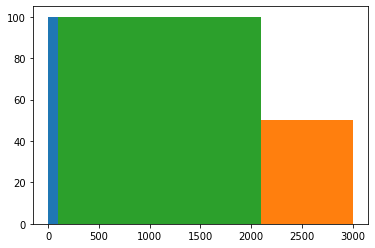

In [11]:
# Show basic stats
my_stats(X_train)
my_stats(X_test)
my_stats(y_train)



In [12]:
# Fit the first model 
# One layer 
# With smell/default learning rate it is TERRIBLE !
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 513.6979 - mae: 513.6979
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 481.8493 - mae: 481.8493
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 450.0294 - mae: 450.0294
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 418.0670 - mae: 418.0670
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 386.1843 - mae: 386.1843
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 354.4865 - mae: 354.4865
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 322.6262 - mae: 322.6262
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 290.6887 - mae: 290.6887
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 258.9157 - mae: 258.9157
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 227.0204 - mae: 227.0204


mae =  377.09146 | mse =  143231.48
Min= 1.0 Q25= 501.0 Q50= 1001.0 Q90= 1799.0
Max= 1999.0 Mean= 1000.0 StdDev= 577.35

Min= 2001.0 Q25= 2251.0 Q50= 2501.0 Q90= 2899.0
Max= 2999.0 Mean= 2500.0 StdDev= 288.67

Min= 100.0 Q25= 600.0 Q50= 1100.0 Q90= 1898.0
Max= 2098.0 Mean= 1099.0 StdDev= 577.35

Min= 2100.0 Q25= 2350.0 Q50= 2600.0 Q90= 2998.0
Max= 3098.0 Mean= 2599.0 StdDev= 288.67

Min= 1778.48 Q25= 2000.64 Q50= 2222.8 Q90= 2576.47
Max= 2665.34 Mean= 2221.91 StdDev= 256.53



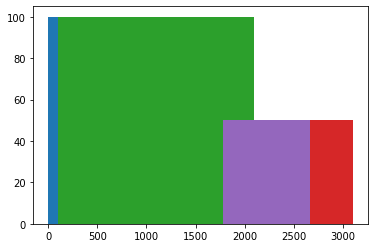

In [13]:

# Predict and plot 
y_pred = model.predict(X_test)

# Get mae_mse
my_mae_mse(y_test, y_pred)

# Summary 
# Show basic stats
my_stats2(X_train)
my_stats2(X_test)
my_stats2(y_train)
my_stats2(y_test)
my_stats2(y_pred)



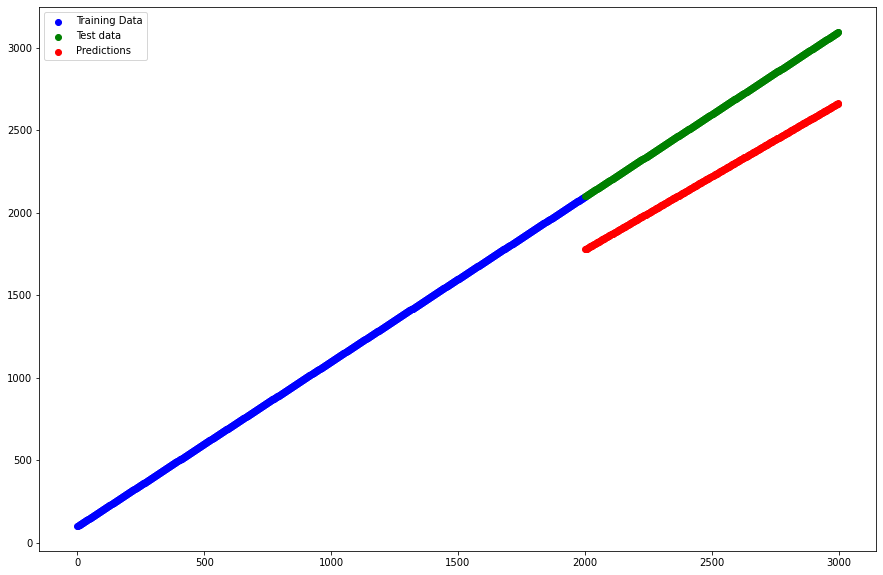

In [14]:
# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 295.7043 - mae: 295.7043
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 61.4008 - mae: 61.4008
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 41.5755 - mae: 41.5755
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 41.1381 - mae: 41.1381
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 40.7451 - mae: 40.7451
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 40.6571 - mae: 40.6571
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 41.3032 - mae: 41.3032
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 40.6375 - mae: 40.6375
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 40.5563 - mae: 40.5563
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 40.5720 - mae: 40.5720
Min= 1.0 Q25= 501.0 Q50= 1001.0 Q90= 1799.0
Max

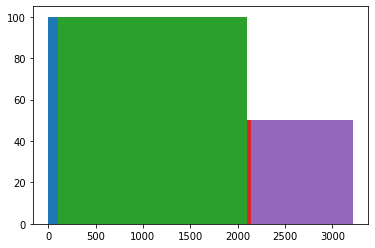

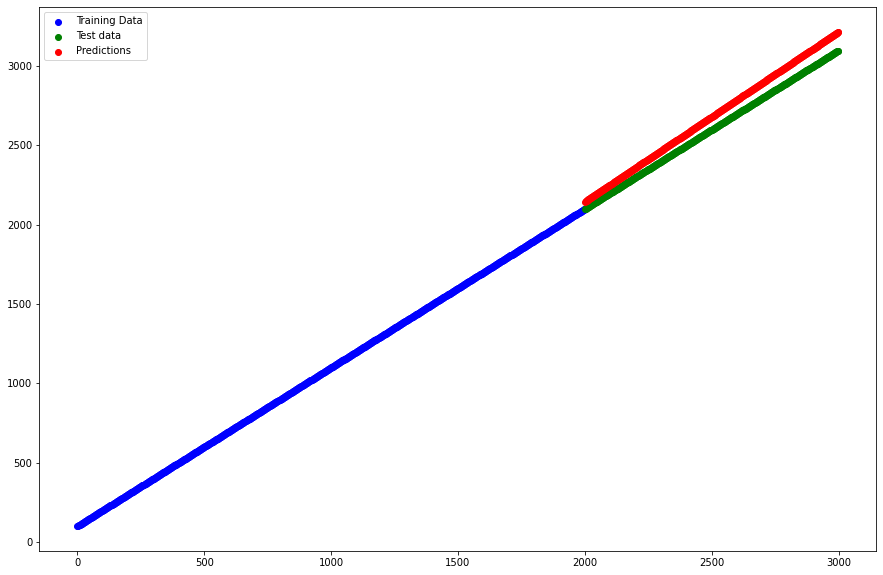

In [15]:
# Fit the second model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)

# Predict 
y_pred = model.predict(X_test)

# Summary 
my_stats2(X_train)
my_stats2(X_test)
my_stats2(y_train)
my_stats2(y_test)
my_stats2(y_pred)

# Get mae_mse
my_mae_mse(y_test, y_pred)

# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 33629.9648 - mae: 33629.9648
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 7067.0371 - mae: 7067.0371
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 8094.9878 - mae: 8094.9878
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 19435.9766 - mae: 19435.9766
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 5330.2432 - mae: 5330.2432
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 17528.5742 - mae: 17528.5742
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 7551.4346 - mae: 7551.4346
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 9204.1953 - mae: 9204.1953
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 10039.9893 - mae: 10039.9893
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 10587.9541 - mae: 10587.9541

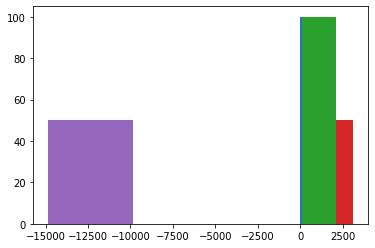

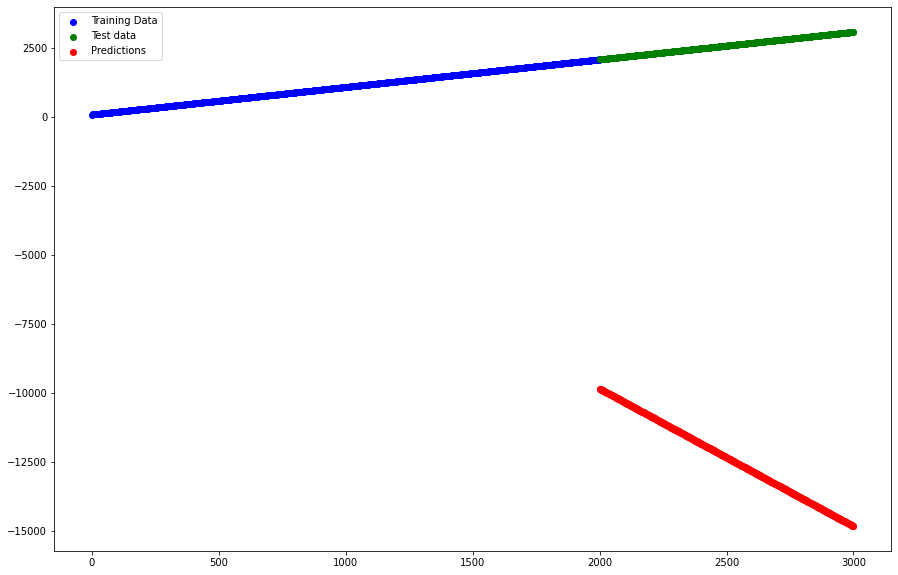

In [16]:
# Fit the third model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=100.0),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)

# Predict 
y_pred = model.predict(X_test)

# Summary 
my_stats2(X_train)
my_stats2(X_test)
my_stats2(y_train)
my_stats2(y_test)
my_stats2(y_pred)


# Get mase_mse
my_mae_mse(y_test, y_pred)

# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [17]:
# Calculate the mean absolute error and the mean squared error 
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
print ('mae = ',mae.numpy(),'| mse = ',mse.numpy())

mae =  14945.898 | mse =  226374270.0


16/16 [==============================] - 0s 1ms/step - loss: 9.3516 - mae: 9.3516
Min= 1.0 Q25= 501.0 Q50= 1001.0 Q90= 1799.0
Max= 1999.0 Mean= 1000.0 StdDev= 577.35

Min= 2001.0 Q25= 2251.0 Q50= 2501.0 Q90= 2899.0
Max= 2999.0 Mean= 2500.0 StdDev= 288.67

Min= 100.0 Q25= 600.0 Q50= 1100.0 Q90= 1898.0
Max= 2098.0 Mean= 1099.0 StdDev= 577.35

Min= 2100.0 Q25= 2350.0 Q50= 2600.0 Q90= 2998.0
Max= 3098.0 Mean= 2599.0 StdDev= 288.67

Min= 2104.36 Q25= 2356.86 Q50= 2609.36 Q90= 3011.34
Max= 3112.34 Mean= 2608.35 StdDev= 291.56

mae =  9.351586 | mse =  95.77568


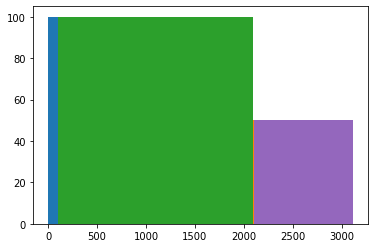

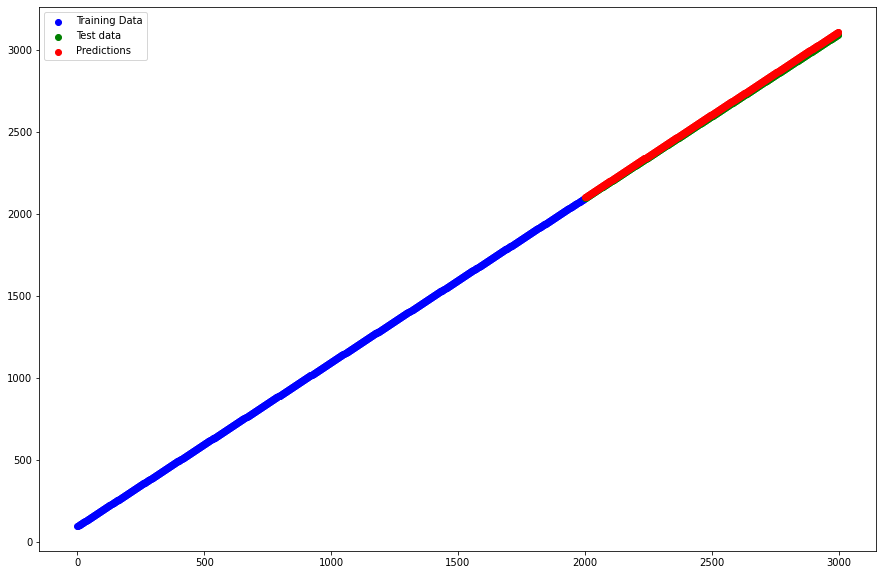

In [18]:
# Fit the fourth model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Model Summry
model.summary

# Fit the model
model.fit(X_train, y_train, epochs = 300, verbose=0)

# Predict 
y_pred = model.predict(X_test)

# Evaluate
model.evaluate(X_test, y_test)

# Summary 
my_stats2(X_train)
my_stats2(X_test)
my_stats2(y_train)
my_stats2(y_test)
my_stats2(y_pred)


# Get mae_mse
my_mae_mse(y_test, y_pred)


# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

Model: "Testing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 1)                 2         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 100)               200       
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 101       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


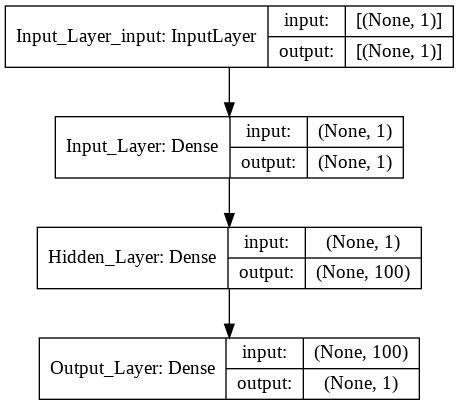

In [72]:
# Do another model, add input_shape and show model details _before_ fitting 

# Create the nodel 
model = tf.keras.Sequential(name="Testing")
model.add(tf.keras.layers.Dense(1, input_shape=[1], name='Input_Layer'))
model.add(tf.keras.layers.Dense(100, activation="relu", name="Hidden_Layer"))
#model.add(tf.keras.layers.Dense(3, input_shape=[1]))
model.add(tf.keras.layers.Dense(1, name="Output_Layer"))

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=tf.keras.metrics.mae)

# Get the model summary 
model.summary()

# Why are there 303 instead of 300 parameters ?
# Becuase of the 3 in the putput layer 
pm(model=model,show_shapes=True)



16/16 [==============================] - 0s 1ms/step - loss: 68.9707 - mean_absolute_error: 68.9707
Min= 1.0 Q25= 501.0 Q50= 1001.0 Q90= 1799.0
Max= 1999.0 Mean= 1000.0 StdDev= 577.35

Min= 2001.0 Q25= 2251.0 Q50= 2501.0 Q90= 2899.0
Max= 2999.0 Mean= 2500.0 StdDev= 288.67

Min= 100.0 Q25= 600.0 Q50= 1100.0 Q90= 1898.0
Max= 2098.0 Mean= 1099.0 StdDev= 577.35

Min= 2100.0 Q25= 2350.0 Q50= 2600.0 Q90= 2998.0
Max= 3098.0 Mean= 2599.0 StdDev= 288.67

Min= 2154.92 Q25= 2411.96 Q50= 2669.0 Q90= 3078.21
Max= 3181.03 Mean= 2667.97 StdDev= 296.81

mae =  68.97075 | mse =  4823.0723


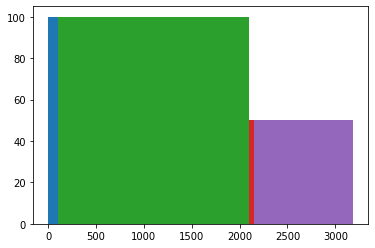

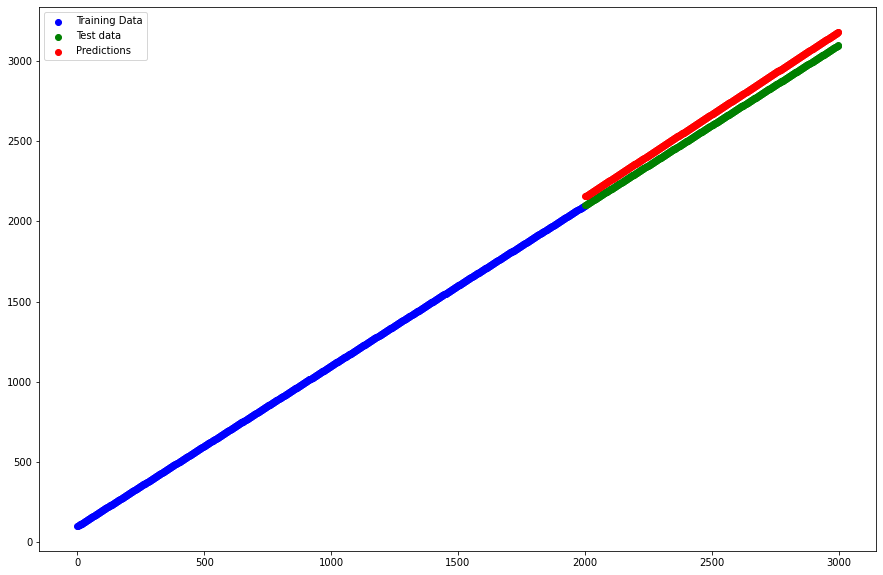

In [71]:
# Fit the model
model.fit(X_train, y_train, epochs = 300, verbose=0)

# Predict 
y_pred = model.predict(X_test)

# Evaluate
model.evaluate(X_test, y_test)

# Summary 
my_stats2(X_train)
my_stats2(X_test)
my_stats2(y_train)
my_stats2(y_test)
my_stats2(y_pred)


# Get mae_mse
my_mae_mse(y_test, y_pred)


# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [ ]:
# Now fit a realistic model 
# Add the model description + the metrics + the epocs etc to a data frame to track this 

